In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import datasets
from sklearn.base import clone

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
np.random.seed(0)


Para entender Ridge: https://www.youtube.com/watch?v=OEU22e20tWw&list=PL2EMYKnlb0FYOLwud3_gBq0376q0Kz2eS&index=15 \
Para entender LASSO: https://www.youtube.com/watch?v=eGXw9n7AnV4&list=PL2EMYKnlb0FYOLwud3_gBq0376q0Kz2eS&index=14

* En Ridge: se añade una penalización de alpha * la pendiente al cuadrado a la minimización de la suma de residuales al cuadrado 
* En LASSO: la diferencia respecto a Ridge es que la penalización es de alpha * el valor absoluto de la pendiente

Carga de datos

In [2]:
data = datasets.load_diabetes(as_frame=True)['frame']
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Significado de variables: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Descripción de datos

In [3]:
data.describe().T 
#Solo para ver la tabla en el sentido contrario 

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


* Se puede observar que no hay datos faltantes

Gráfico descriptivo 

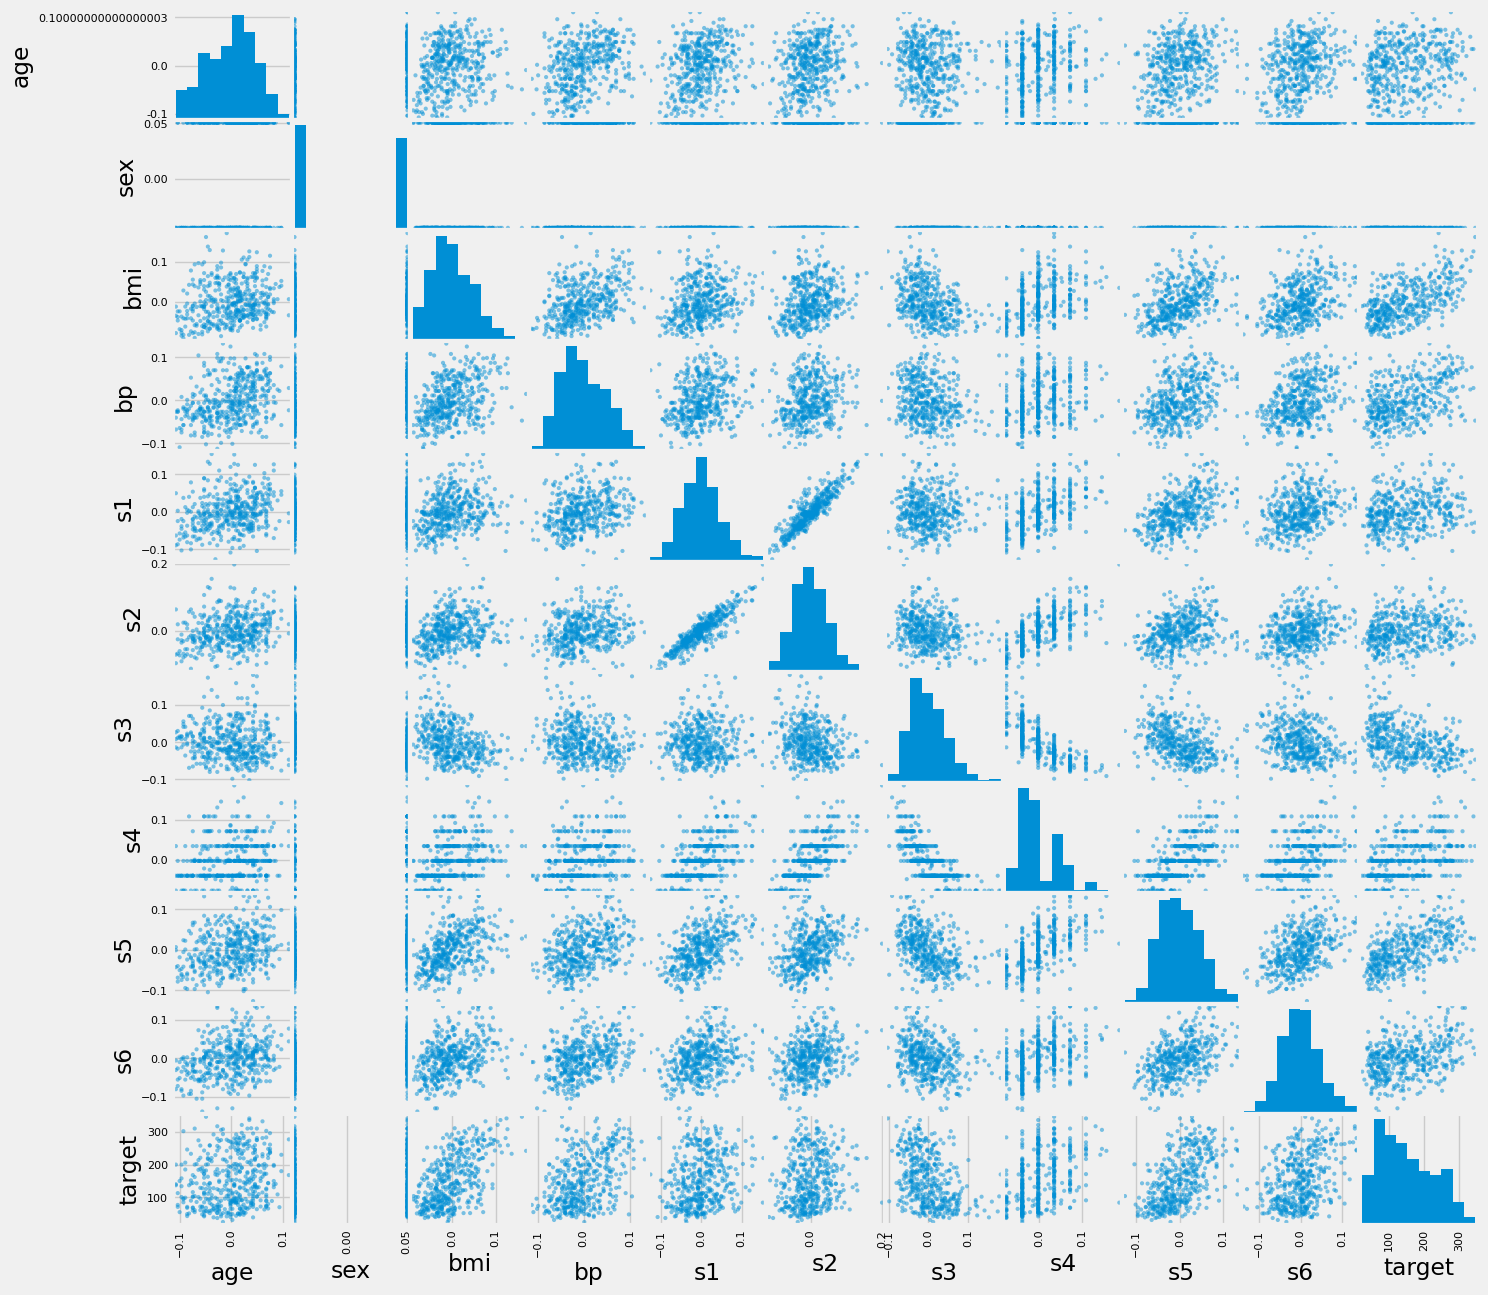

In [4]:
plot = pd.plotting.scatter_matrix(data, alpha = 0.5, figsize=(15,15))

Si hay líneas verticales u horizontales, te puede indicar la existencia de **grupos**. \
Si hay agrupaciones no tan marcadas pero con cierta dirección (+,-), puede indicar **tendencia** \
S4 parece tener cierta importancia porque a la izquierda y derecha, arriba y abajo de la diagonal, existen grupos. **Por tanto, podría ser un predictor muy relevante**

Separación: X y y

In [5]:
X = data.drop(['target'], axis =1)
y = data['target']

*La regularización **Ridge** es una forma de contracción: las estimaciones de los parámetros se reducen hacia cero en comparación con las estimaciones de una regresión no regularizada. La cantidad de regularización (es decir, la severidad de la contracción) se establece a través del parámetro alfa de Ridge, que necesita ser ajustado con validación cruzada.*

División de datos: entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)
#Random_state te permite replicar el ejercicio después; onda random seed

Regresión Ridge

In [7]:
rg = Ridge(alpha = 0.5)
rg.fit(X_train, y_train)
y_hat = rg.predict(X_test)
y_hat

array([110.05218048, 169.38764463, 180.18029918, 185.0329472 ,
       161.91200506, 210.57015509, 154.38717444, 111.17029767,
       161.64876084, 135.25661058, 168.2758955 , 118.56716862,
        76.14403378, 169.89756104,  83.7563456 , 163.14250435,
       141.76932169, 134.88099756,  96.64374531, 137.58401044,
        88.74503202, 215.15185192, 136.95282349, 129.43581985,
        91.51783256, 168.08287227, 144.21964693, 116.57864499,
       179.10926799,  92.84406984, 152.91405652, 153.16535259,
       128.7225316 , 166.40021593,  98.89973573,  80.27339571,
       121.66224235, 101.20067003, 195.98067111, 143.9180893 ,
       149.69360563,  91.84168009, 156.28523388, 157.75530379,
       197.34664058, 140.25207091, 107.48277389, 156.42725184,
       124.14505283, 227.33194035, 198.97995044, 169.18096651,
       207.25348261, 198.98593439, 146.13325103, 181.82632402,
       135.19788747, 143.02087902, 125.77592638, 156.28739442,
       162.78168053,  77.71083844, 186.23217433, 179.95

R^2

In [8]:
print(r2_score(y_test,y_hat))

0.407199746560157


MSE

In [9]:
print(mean_squared_error(y_test,y_hat))

3655.053814417141


Validación cruzada

In [10]:
n_folds = 5
random_seed = 0
kf = KFold(n_splits=n_folds, random_state=random_seed, shuffle=True)
test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)

X_train_cv = np.array(X_train)
y_train_cv = np.array(y_train)

for j, (train_index,test_index) in enumerate(kf.split(X_train_cv)):
    X_tr = X_train_cv[train_index]
    y_tr = y_train_cv[train_index]
    X_tst = X_train_cv[test_index]
    y_tst = y_train_cv[test_index]

    rg = Ridge(alpha = 0.5)
    rg.fit(X_tr, y_tr)

    #Train
    y_tr_hat = rg.predict(X_tr)
    mse_train = mean_squared_error(y_tr,y_tr_hat)
    train_cv_errors[j] = mse_train

    #Test
    y_tst_hat = rg.predict(X_tst)
    mse_test = mean_squared_error(y_tst,y_tst_hat)
    test_cv_errors[j] = mse_test

In [11]:
train_cv_errors

array([2966.49314236, 2911.85025803, 3004.54181471, 2760.93075815,
       3064.54079992])

In [12]:
test_cv_errors

array([3214.06974127, 3220.26302643, 2591.88615368, 3736.99096529,
       2471.12531011])

Convertiéndolo en función

In [13]:
def cv(X, y, estimator, folds, seed=154):
    '''
    Parámetros
    ---------
    X: np.array 
        Matriz de predictores
    y: np.array 
        Matriz de variable predicha
    estimator: sklearn model object
        El estimador a utilizar
    folds: int
        Número de dobleces para la validación cruzada
    seed: int
        Semilla para poder replicar
    Arroja
    ---------
    train_cv_errors, test_cv_errors: tuple de arrays
    Los errores de los sets de entrenamiento y prueba para cada doblez de la validación cruzada
    '''
    X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.33,random_state=seed)
    kf = KFold(n_splits=folds)
    test_cv_errors, train_cv_errors = np.empty(folds), np.empty(folds)

    for j, (train_index,test_index) in enumerate(kf.split(X_train)):
        X_tr = X_train[train_index]
        y_tr = y_train[train_index]
        X_tst = X_train[test_index]
        y_tst = y_train[test_index]

        #Esto se hace para poder adecuarse conforma al tipo de estimador establecido: puede ser ridge, lasso, etc. 
        estimator_clone = clone(estimator)
        estimator_clone.fit(X_tr, y_tr)

        #Train
        y_tr_hat = estimator_clone.predict(X_tr)
        mse_train = mean_squared_error(y_tr,y_tr_hat)
        train_cv_errors[j] = mse_train

        #Test
        y_tst_hat = estimator_clone.predict(X_tst)
        mse_test = mean_squared_error(y_tst,y_tst_hat)
        test_cv_errors[j] = mse_test
    
    return train_cv_errors, test_cv_errors

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.33,random_state=40)
train_cv_errors, test_cv_errors = cv(np.array(X_train), np.array(y_train), Ridge(alpha=0.5), folds = 10)
train_cv_errors, test_cv_errors

(array([3008.04993772, 3238.33958604, 3096.82662743, 3099.16047798,
        3144.62595621, 3134.09905592, 3142.38575392, 3070.00108691,
        3046.70193951, 3162.42892833]),
 array([3866.23212404, 2172.33423051, 3651.42525483, 3118.52420701,
        2765.55472032, 3264.51852158, 3259.67186763, 4074.5170835 ,
        4015.80749497, 2565.64710773]))

In [15]:
print(train_cv_errors.mean(), test_cv_errors.mean())

3114.2619349960637 3275.4232612130013


Para establecer el valor óptimo de alpha (insumo esencial para la regresión Ridge y Lasso), se construye la sig. función

In [16]:
def train_at_various_alphas(X,y,model,alphas,n_folds=10,**kwargs):
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))), columns = alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))), columns = alphas)

    for alpha in alphas:
        cv_errors_train[alpha], cv_errors_test[alpha] = cv(X,y,model(alpha), n_folds)
    
    return cv_errors_train, cv_errors_test

In [17]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(np.array(X_train), np.array(y_train), Ridge, ridge_alphas)

#Cada renglón representa un doblez de validación cruzada, cada columna es un valor de alpha
ridge_cv_errors_train, ridge_cv_errors_test

(   0.010000      0.010571      0.011174      0.011811      0.012485      \
 0   2417.564716   2417.847814   2418.141983   2418.448712   2418.769670   
 1   2713.452748   2713.799213   2714.152495   2714.513609   2714.883733   
 2   2584.130328   2584.766271   2585.403059   2586.041348   2586.681995   
 3   2529.629332   2529.982999   2530.343848   2530.713043   2531.091928   
 4   2541.880763   2542.257068   2542.642683   2543.039219   2543.448486   
 5   2607.500504   2608.068679   2608.640795   2609.217654   2609.800244   
 6   2621.559718   2622.133376   2622.708892   2623.287157   2623.869254   
 7   2527.348097   2527.848086   2528.353192   2528.864375   2529.382788   
 8   2533.757800   2534.182779   2534.612498   2535.047867   2535.489969   
 9   2592.636579   2593.095112   2593.561352   2594.036391   2594.521513   
 
    0.013197      0.013950      0.014746      0.015587      0.016477      ...  \
 0   2419.106720   2419.461937   2419.837623   2420.236327   2420.660865  ...   


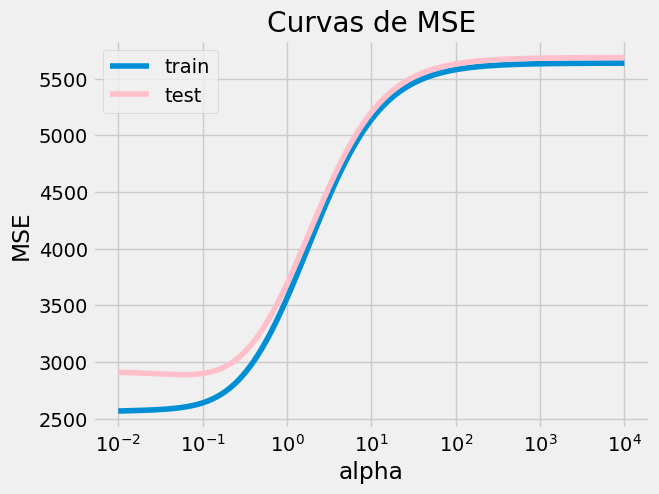

In [18]:
ridge_cv_errors_train.mean(), ridge_cv_errors_test.mean()

fig, ax = plt.subplots()
ax.semilogx(ridge_alphas, ridge_cv_errors_train.mean(), label = 'train')
ax.semilogx(ridge_alphas, ridge_cv_errors_test.mean(), label = 'test', color='pink')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('Curvas de MSE')
ax.legend();



¿Cuál sería el aplha óptima en este caso?

In [19]:
ridge_cv_errors_test_min = ridge_cv_errors_test.mean()[ridge_cv_errors_test.mean() == ridge_cv_errors_test.mean().min()]

optimal_alpha = ridge_cv_errors_test_min.index

In [20]:
optimal_alpha

Float64Index([0.05903157047645996], dtype='float64')

Para elegir el alpha óptimo, se selecciona el mínimo promedio

In [21]:
ridge_cv_errors_test_min

0.059032    2887.927206
dtype: float64

Graficando lo anterior pero resaltando el alpha óptimo

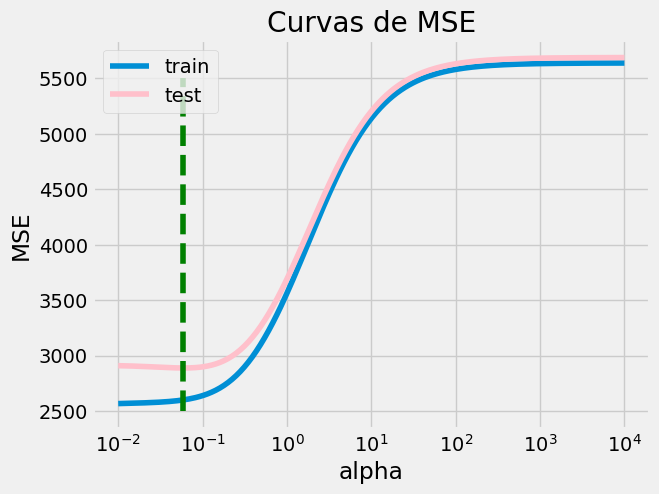

In [22]:
fig, ax = plt.subplots()
ax.semilogx(ridge_alphas, ridge_cv_errors_train.mean(), label = 'train')
ax.semilogx(ridge_alphas, ridge_cv_errors_test.mean(), label = 'test', color='pink')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('Curvas de MSE')
ax.legend()
ax.vlines(x=optimal_alpha, ymin=2500, ymax=5500, colors='green', linestyles='dashed');

#Ver documentación para las líneas verticales: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.vlines.html


Ahora, teniendo el óptimo de alpha, se analizan los valores de beta vía múltiples modelos de regresión Ridge 

Se define la función necesaria para almacenar los coeficientes de los modelos con las distintas alphas

In [23]:
def ridge_coef_calc(X,y,alphas):
    n_alphas = len(alphas)
    n_features = X.shape[1] #Número de predictores (columnas)
    coefs = np.zeros((n_alphas, n_features)) #Para almacenar los valores de beta de los distintos modelos 

    for i, alpha in enumerate(alphas):
        #Fitting del modelo
        model = Ridge(alpha = alpha).fit(X,y)
        #guardando los coeficientes del modelo de acuerdo con el alpha
        coefs[i]=model.coef_
    
    return coefs

In [24]:
coefs_ridge = ridge_coef_calc(X_train, y_train, ridge_alphas)
coefs_ridge

array([[ 1.75104656e+00, -2.19928698e+02,  5.88883995e+02, ...,
         1.25196714e+02,  6.28538834e+02,  4.00498491e+01],
       [ 1.85966111e+00, -2.19649193e+02,  5.88459477e+02, ...,
         1.24516314e+02,  6.24810958e+02,  4.02211794e+01],
       [ 1.97133200e+00, -2.19358040e+02,  5.88006931e+02, ...,
         1.23859183e+02,  6.21124203e+02,  4.04010619e+01],
       ...,
       [ 2.62564857e-02,  6.32908158e-03,  7.15330725e-02, ...,
         4.75286951e-02,  6.79715287e-02,  4.31760916e-02],
       [ 2.48398355e-02,  5.98782003e-03,  6.76729517e-02, ...,
         4.49642213e-02,  6.43036834e-02,  4.08464496e-02],
       [ 2.34995948e-02,  5.66494195e-03,  6.40210967e-02, ...,
         4.25380771e-02,  6.08337213e-02,  3.86424721e-02]])

In [25]:
coefs_ridge.shape

(250, 10)

Son 250 renglones porque fueron 250 alphas calculadas; y son 10 columnas porque ese es el número de predictores

Graficando las betas de Ridge bajo las distintas betas

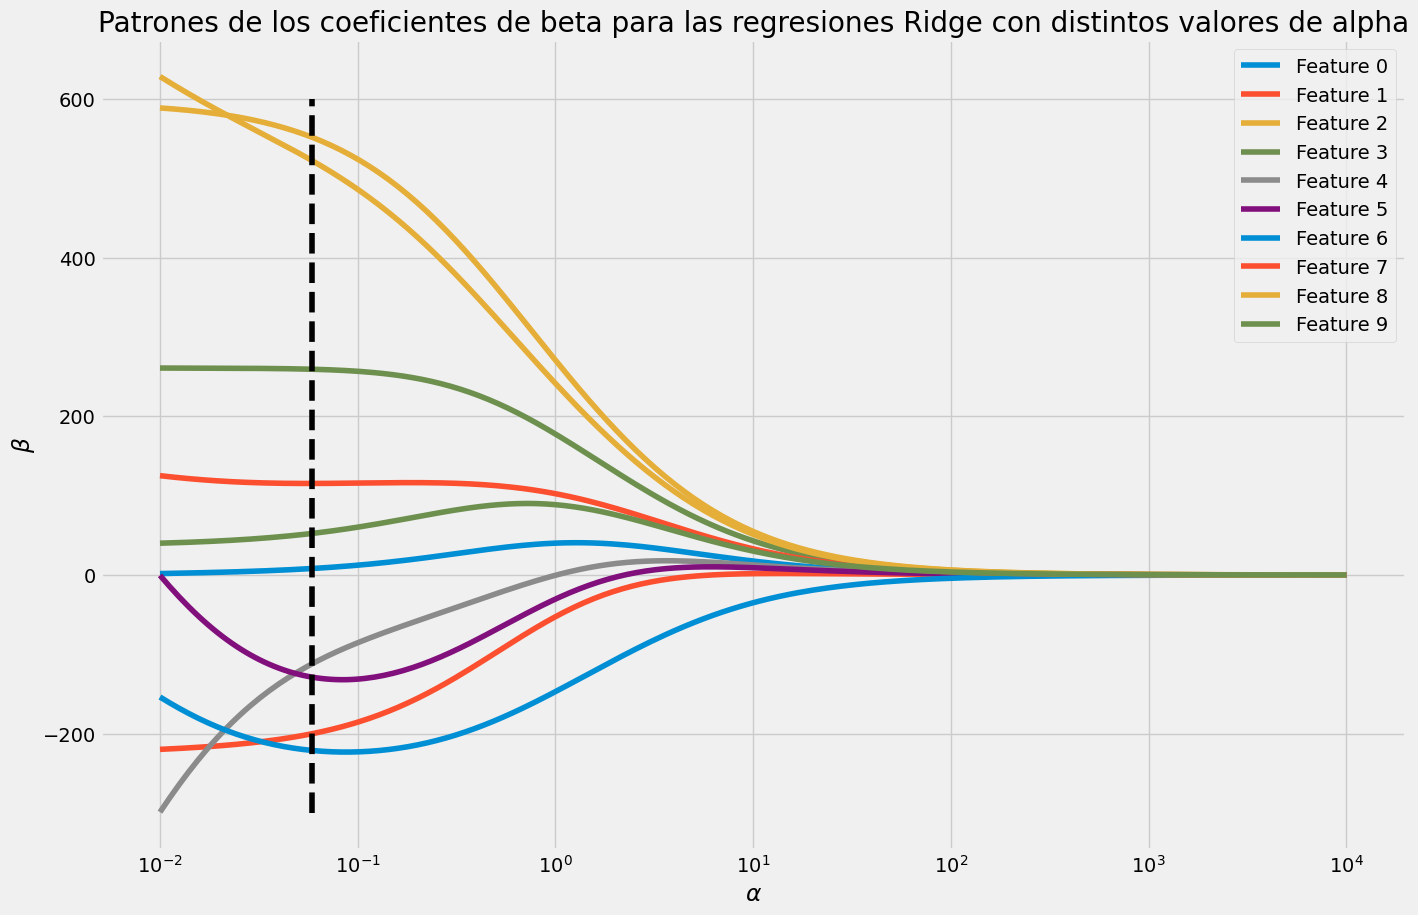

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
i = 0
while i < 10:
    ax.semilogx(ridge_alphas, coefs_ridge[:,i], label = 'Feature {}'.format(i))
    i+=1
ax.plot([optimal_alpha, optimal_alpha], [-300,600], color='black', linestyle='dashed')
ax.set_title('Patrones de los coeficientes de beta para las regresiones Ridge con distintos valores de alpha')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right');


Del gráfico anterior, con el alpha óptima que minimiza los errores, ves que las betas no necesariamente convergen a 0. Esto indica que aún teniendo el óptimo en los errores en el set de entrenamiento y de prueba, tienes aún la posibilidad de interpretar los coeficientes de beta.

Ahora, se realiza la regresión LASSO. 

*La **regresión LASSO** es útil para imponer la dispersión en los coeficientes. Es decir, es preferible si creemos que muchas de las características no son en absoluto relevantes para predecir el objetivo.*

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.3,random_state=40)
#Random_state te permite replicar el ejercicio después; onda random seed

In [29]:
lasso_alphas = np.logspace(-2, 4, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(np.array(X_train), np.array(y_train), Lasso, lasso_alphas)

#Cada renglón representa un doblez de validación cruzada, cada columna es un valor de alpha
lasso_cv_errors_train, lasso_cv_errors_test 

(   0.010000      0.010571      0.011174      0.011811      0.012485      \
 0   2267.018328   2267.106776   2267.205688   2267.316299   2267.440014   
 1   2466.137103   2466.191564   2466.251855   2466.319552   2466.394851   
 2   2267.408509   2267.522883   2267.650663   2267.793419   2267.953005   
 3   2243.354584   2243.418332   2243.491251   2243.571272   2243.661065   
 4   2287.753844   2287.854762   2287.967125   2288.092586   2288.232670   
 5   2289.776572   2289.856091   2289.945087   2290.037017   2290.123216   
 6   2041.058361   2041.128619   2041.207313   2041.295157   2041.393208   
 7   2283.478334   2283.535574   2283.596953   2283.664908   2283.741598   
 8   2247.448217   2247.506899   2247.571527   2247.644085   2247.725516   
 9   2295.331855   2295.393579   2295.462641   2295.539882   2295.626304   
 
    0.013197      0.013950      0.014746      0.015587      0.016477      ...  \
 0   2267.578430   2267.733340   2267.905026   2268.097247   2268.312538  ...   


In [30]:
lasso_cv_errors_test_min = lasso_cv_errors_test.mean()[lasso_cv_errors_test.mean() == lasso_cv_errors_test.mean().min()]

optimal_alpha = lasso_cv_errors_test_min.index
optimal_alpha

Float64Index([0.08704804787452367], dtype='float64')

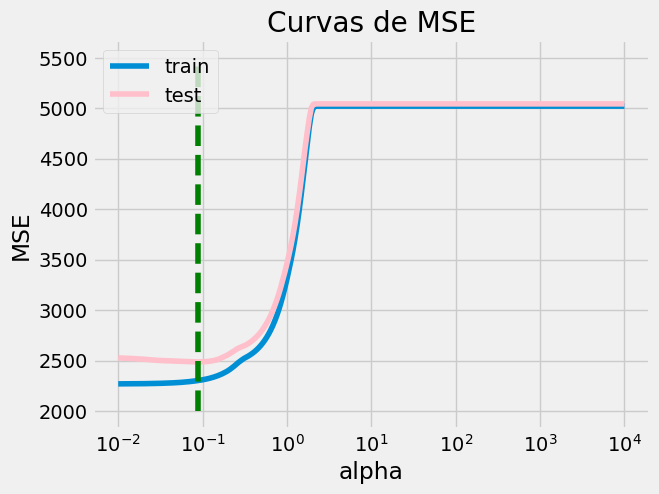

In [33]:
fig, ax = plt.subplots()
ax.semilogx(lasso_alphas, lasso_cv_errors_train.mean(), label = 'train')
ax.semilogx(lasso_alphas, lasso_cv_errors_test.mean(), label = 'test', color='pink')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('Curvas de MSE')
ax.legend()
ax.vlines(x=optimal_alpha, ymin=2000, ymax=5500, colors='green', linestyles='dashed');

In [34]:
def lasso_coef_calc(X,y,alphas):
    n_alphas = len(alphas)
    n_features = X.shape[1] #Número de predictores (columnas)
    coefs = np.zeros((n_alphas, n_features)) #Para almacenar los valores de beta de los distintos modelos 

    for i, alpha in enumerate(alphas):
        #Fitting del modelo
        model = Lasso(alpha = alpha).fit(X,y)
        #guardando los coeficientes del modelo de acuerdo con el alpha
        coefs[i]=model.coef_
    
    return coefs

In [35]:
coefs_lasso = lasso_coef_calc(X_train, y_train, lasso_alphas)
coefs_lasso

array([[  13.48622517, -215.91819522,  585.38180245, ...,  107.47546979,
         606.79568295,   30.56132804],
       [  13.22793016, -215.36993787,  585.24235142, ...,  105.41034638,
         606.45636455,   30.36968345],
       [  12.95489888, -214.7904013 ,  585.09494442, ...,  103.22740339,
         606.09768733,   30.16710514],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

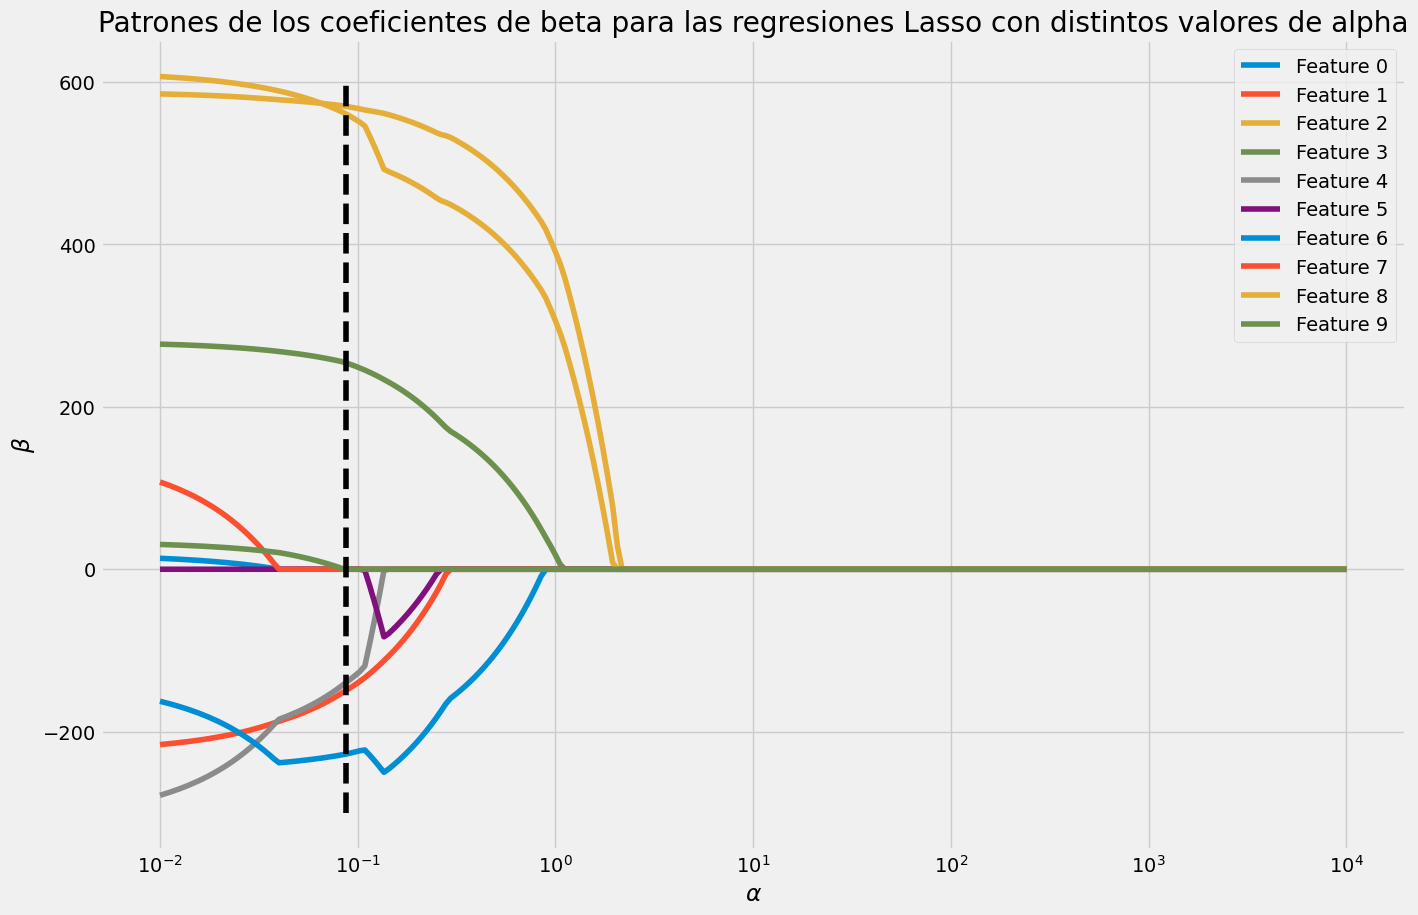

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
i = 0
while i < 10:
    ax.semilogx(lasso_alphas, coefs_lasso[:,i], label = 'Feature {}'.format(i))
    i+=1
ax.plot([optimal_alpha, optimal_alpha], [-300,600], color='black', linestyle='dashed')
ax.set_title('Patrones de los coeficientes de beta para las regresiones Lasso con distintos valores de alpha')
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$\\beta$')
ax.legend(loc='upper right');

El gráfico anterior indica que, bajo alpha óptima (donde se minimizan los errores), hay varias variables predictoras que no aportan mucho (irrelevantes en la predicción de y); y por tanto, deberían tornarse en cero. 

Realizando una comparación entre el desempeño de **LASSO** y  **Ridge**

In [47]:
print('Alpha óptima de LASSO:', lasso_cv_errors_test_min)
print('Alpha óptima de Ridge:', ridge_cv_errors_test_min)


Alpha óptima de LASSO: 0.087048    2485.940787
dtype: float64
Alpha óptima de Ridge: 0.059032    2887.927206
dtype: float64


Con Ridge: 

In [48]:
model = Ridge(alpha = 0.059032)
model.fit(X_train, y_train)

Ridge(alpha=0.059032)

In [49]:
yhat = model.predict(X_test)
mse = mean_squared_error(y_test, yhat)
print(mse)

3644.0482203495503


Con LASSO:

In [54]:
model = Ridge(alpha = 0.087048)
model.fit(X_train, y_train)

Ridge(alpha=0.087048)

In [55]:
yhat = model.predict(X_test)
mse = mean_squared_error(y_test, yhat)
print(mse)

3624.0355261380073


Comparando con una regresión lineal no regularizada

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
yhat = model.predict(X_test)

In [43]:
mse = mean_squared_error(y_test, yhat)
print(mse)

3675.8949016189426


El modelo que se elegiría sería un modelo LASSO. Antes de ponerlo en producción, vería si hay otra alternativa con mejor desempeño.